<a href="https://colab.research.google.com/github/Ziyi-star/Bachelor-Project/blob/main/notebooks/Handlebar/03-Lstm__Handlebar_tensorflow_v1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For Vscode
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 42

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *

df = pd.read_csv('../../data/handlebar/processed_segments_overlap_20.csv')
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

ModuleNotFoundError: No module named 'utils'

In [2]:
# For Colab
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
RANDOM_SEED = 42


import os
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Project/data/processed_segments_overlap_20.csv')
# # 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()
df.head()

Mounted at /content/drive


,Unnamed: 0,curb_scene,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0,0.0,8.757996,8.801086,8.815445,8.796295,8.791504,8.796295,8.805878,8.801086,...,8.772354,8.757996,8.791504,8.781937,8.753204,8.777145,8.810669,8.767563,8.815445,8.781937
2,0,0.0,8.762772,8.767563,8.777145,8.777145,8.748413,8.762772,8.805878,8.781937,...,8.777145,8.767563,8.772354,8.777145,8.796295,8.801086,8.805878,8.772354,8.796295,8.805878
3,0,0.0,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,...,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,8.791504,8.786728,8.786728
4,0,0.0,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,...,8.762772,8.762772,8.781937,8.781937,8.805878,8.781937,8.762772,8.757996,8.762772,8.767563


In [3]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'],
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)

In [4]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])

In [5]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
# train_data_scaled_df['start_time'] = train_data['start_time'].values
# train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
# test_data_scaled_df['start_time'] = test_data['start_time'].values
# test_data_scaled_df['end_time'] = test_data['end_time'].values

In [6]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].iloc[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].iloc[:, :-3]
# Example usage: Accessing the original index
print(normal_test_data_scaled.index)
print(abnormal_test_data_scaled.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1154, 1155, 1156, 1157, 1158, 1160, 1161, 1162, 1163, 1164],
      dtype='int64', length=1123)
Index([  76,   83,   93,  107,  148,  192,  204,  218,  256,  283,  296,  312,
        380,  413,  417,  451,  459,  498,  501,  502,  512,  616,  682,  705,
        709,  713,  720,  726,  735,  808,  822,  927,  970, 1007, 1023, 1042,
       1055, 1072, 1084, 1150, 1151, 1159],
      dtype='int64')


In [7]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")

In [8]:
normal_train_data_scaled_lstm = np.expand_dims(normal_train_data_scaled, axis=2)
normal_test_data_scaled_lstm = np.expand_dims(normal_test_data_scaled, axis=2)
abnormal_test_data_scaled_lstm = np.expand_dims(abnormal_test_data_scaled, axis=2)
normal_train_data_scaled_lstm.shape, normal_test_data_scaled_lstm.shape, abnormal_test_data_scaled_lstm.shape

((4486, 97, 1), (1123, 97, 1), (42, 97, 1))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model

model = Sequential()
# Encoder
model.add(Input(shape=(normal_train_data_scaled_lstm.shape[1], normal_train_data_scaled_lstm.shape[2])))
model.add(LSTM(64, activation='tanh', return_sequences=False))
#not Overfitting
model.add(Dropout(rate=0.1))

model.add(RepeatVector(normal_train_data_scaled_lstm.shape[1]))

model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(rate=0.1))
model.add(TimeDistributed(Dense(normal_train_data_scaled_lstm.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 97, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 97, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 97, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 97, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,985 (195.25 KB)

 Trainable params: 49,985 (195.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# define early stopping to prevent overfit
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss",
                                               patience=10,
                                               mode="min",
                                               verbose=1,
                                               restore_best_weights=True)

In [12]:
# fit model
history = model.fit(
    normal_train_data_scaled_lstm, normal_train_data_scaled_lstm,
    epochs=100,
    batch_size=128,
    validation_split=0.3,
    callbacks=[early_stopping],
    shuffle=False,
    verbose=1)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 0.4591 - val_loss: 0.4531
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4544 - val_loss: 0.4497
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4522 - val_loss: 0.4497
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4521 - val_loss: 0.4495
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4520 - val_loss: 0.4499
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4521 - val_loss: 0.4496
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.4519 - val_loss: 0.4495
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4519 - val_loss: 0.4495
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4518 - val_loss: 0.4496
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4520 - val_loss: 0.4495
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4519 - val_loss: 0.4498
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

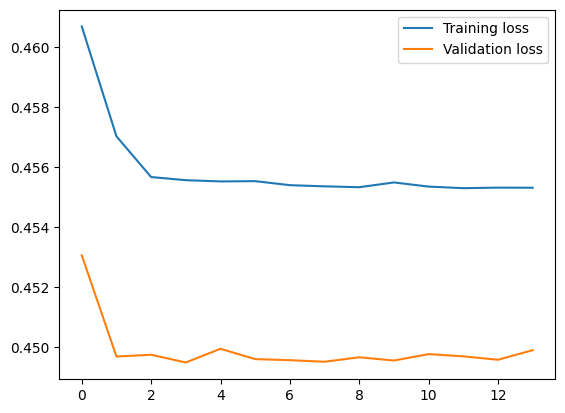

In [13]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


(array([301.,  17.,  13.,  11.,   5.,   1.,   3.,   2.,   0.,   1.,   4.,
         15.,  16.,  28.,  38.,  35.,  47.,  49.,  51.,  52.,  47.,  55.,
         50.,  44.,  33.,  36.,  36.,  27.,  19.,  12.,  16.,  12.,  13.,
          8.,   4.,   5.,   5.,   5.,   2.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([0.0087556 , 0.03828354, 0.06781148, 0.09733942, 0.12686737,
        0.15639532, 0.18592325, 0.2154512 , 0.24497914, 0.27450708,
        0.30403504, 0.33356297, 0.3630909 , 0.39261886, 0.4221468 ,
        0.45167476, 0.48120269, 0.51073068, 0.54025859, 0.56978655,
        0.59931451, 0.62884241, 0.65837038, 0.68789834, 0.71742624,
        0.7469542 , 0.77648216, 0.80601013, 0.83553803, 0.86506599,
        0.89459395, 0.92412186, 0.95364982, 0.98317778, 1.01270568,
        1.04223359, 1.07176149, 1.10128951, 1.13081741, 1.16034532,
        1.18987334, 1.21940124, 1.24892914, 1.27845716, 1.30798507,
        1.33751297, 1.36704099, 1.39656889, 1.

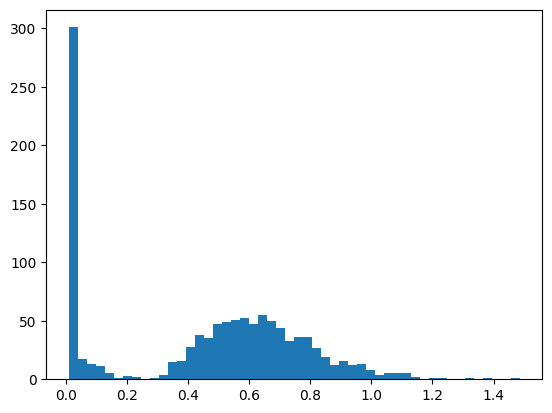

In [14]:
import tensorflow as tf #building model
reconstruction_normal = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction_normal, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


(array([1., 0., 1., 0., 2., 0., 0., 2., 2., 1., 0., 1., 1., 1., 0., 4., 0.,
        1., 1., 1., 0., 0., 0., 2., 1., 0., 2., 1., 0., 2., 2., 2., 1., 1.,
        1., 0., 1., 2., 0., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.98441756, 1.04671597, 1.10901439, 1.17131281, 1.23361111,
        1.29590964, 1.35820794, 1.42050636, 1.48280478, 1.54510319,
        1.60740161, 1.66969991, 1.73199844, 1.79429674, 1.85659516,
        1.91889358, 1.98119199, 2.04349041, 2.10578871, 2.16808724,
        2.23038578, 2.29268408, 2.35498238, 2.41728067, 2.47957921,
        2.54187775, 2.60417604, 2.66647434, 2.72877264, 2.79107118,
        2.85336971, 2.91566801, 2.97796631, 3.04026461, 3.10256338,
        3.16486168, 3.22715998, 3.28945827, 3.35175705, 3.41405535,
        3.47635365, 3.53865194, 3.60095024, 3.66324902, 3.72554731,
        3.78784561, 3.85014391, 3.91244268, 3.97474098, 4.03703928,
        4.09933758]),
 <BarContainer object of 50 artists>)

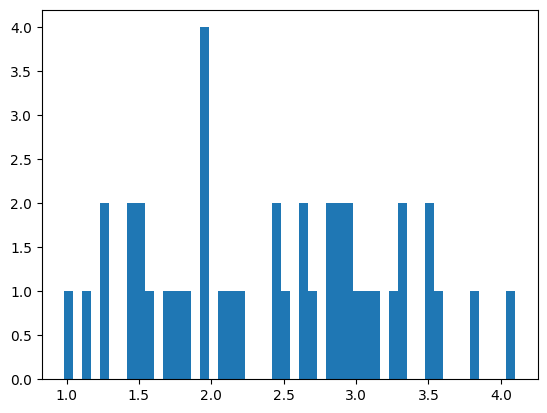

In [15]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

In [16]:
# threshold auswählen nach business logic
threshold = np.mean(train_loss) + 2*np.std(train_loss)
threshold

np.float32(1.1020466)

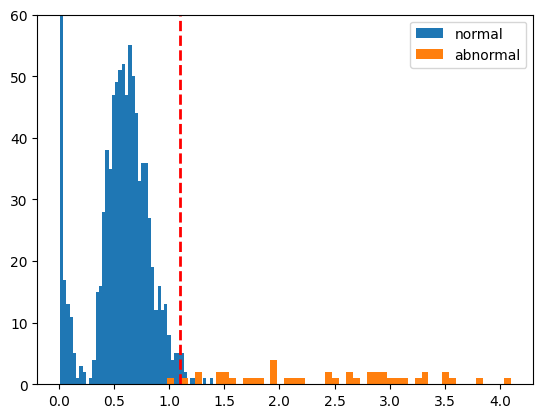

In [17]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threshold))
plt.show()

In [18]:
preds_normal=tf.math.less(train_loss, threshold)
correct = tf.math.count_nonzero(preds_normal)
false_predictions_normal = [i for i, x in enumerate(preds_normal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_normal))
print("False Predictions index: ", false_predictions_normal)

Correct Predictions:  1111
Accuracy:  0.9893143365983972
False Predictions index:  [199, 208, 470, 641, 753, 837, 855, 900, 904, 944, 980, 1009]


In [19]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threshold)
correct = tf.math.count_nonzero(preds_abnormal)
false_predictions_abnormal = [i for i, x in enumerate(preds_abnormal) if not x]
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  0.9761904761904762


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


IndexError: index 97 is out of bounds for axis 1 with size 97

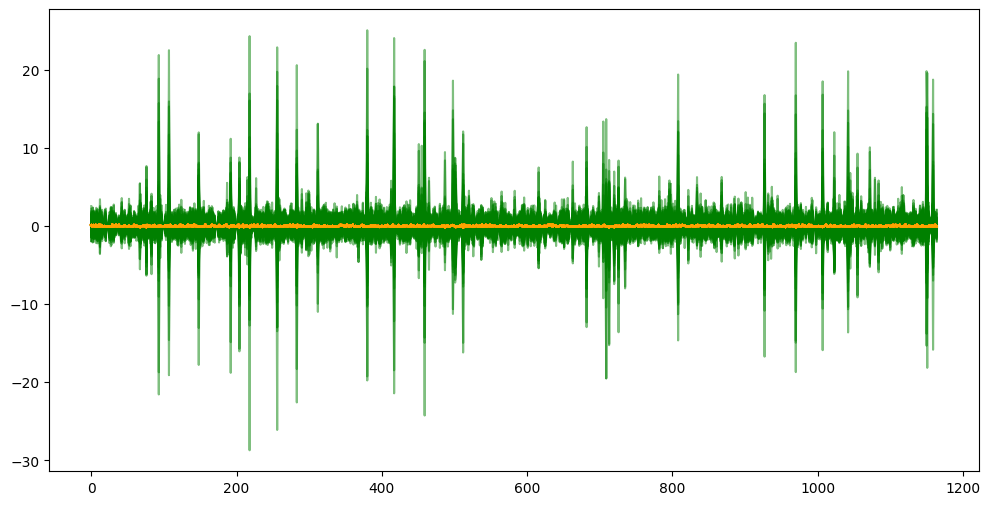

In [20]:
# reconstruct test data using autoencoder

import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your autoencoder model and combined_df ready

# 1. Select columns to plot (e.g., "Acc-Z_1" to "Acc-Z_100")
sensor_cols = [col for col in test_data_scaled_df.columns if col.startswith("Acc-Z_")]

# 2. Extract the sensor data from combined_df
sensor_data = test_data_scaled_df[sensor_cols].values

# 3. Reconstruct the data using the autoencoder
reconstructed_data = model.predict(sensor_data)

# 4. Plot the original and reconstructed data points
plt.figure(figsize=(12, 6))

# Plot original data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, sensor_data[:, i], color='green', alpha=0.5)

# Plot reconstructed data
for i, col in enumerate(sensor_cols):
    plt.plot(test_data_scaled_df.index, reconstructed_data[:, i], color='orange', alpha=0.5)

# Highlight false predictions with a vertical scatter
for row_i in false_predictions_normal:
    y_values = sensor_data[row_i, :]
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3, linewidths=0.1)
for row_i in false_predictions_abnormal:
    y_values = sensor_data[row_i, :]
    x_values = [test_data_scaled_df.index[row_i]] * len(y_values)
    plt.scatter(x_values, y_values, color='red', alpha=1.0, zorder=3)

plt.title("Original and Reconstructed Sensor Data by Row Index of Handlebar")
plt.xlabel("Time Index")
plt.ylabel("Sensor Value for Acc-Z")
plt.tight_layout()
plt.show()